# 库文件

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#显示条目设置
pd.set_option('display.max_columns',1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

# 导入数据集

In [3]:
#数据集导入（windows路径与linux不同，注意修改）
train=pd.read_csv(r'E:\jupyter_notebook\「二分类算法」提供银行精准营销解决方案\dataset\train_set.csv')
test=pd.read_csv(r'E:\jupyter_notebook\「二分类算法」提供银行精准营销解决方案\dataset\test_set.csv')
train = shuffle(train)# 因为训练集是没有打乱的，所以我shuffle了一下，不过不shuffle也没有关系

#下面的数据是给特征增加方法训练用的
train_df=pd.read_csv(r'E:\jupyter_notebook\「二分类算法」提供银行精准营销解决方案\dataset\train_set.csv')
train.df = shuffle(train)# 因为训练集是没有打乱的，所以我shuffle了一下，不过不shuffle也没有关系
test_df=pd.read_csv(r'E:\jupyter_notebook\「二分类算法」提供银行精准营销解决方案\dataset\test_set.csv')

# EDA

In [4]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21647,21648,36,admin.,single,secondary,no,449,yes,no,unknown,20,jun,136,3,-1,0,unknown,0
516,517,43,management,divorced,tertiary,no,-173,no,yes,cellular,18,aug,119,7,-1,0,unknown,0
4464,4465,47,blue-collar,married,secondary,no,846,yes,no,cellular,31,jul,437,2,-1,0,unknown,0
23169,23170,39,unemployed,divorced,secondary,no,265,yes,no,unknown,27,may,93,1,555,2,other,1
6322,6323,36,services,married,secondary,no,138,yes,no,cellular,8,may,39,3,-1,0,unknown,0


In [5]:
train.shape#训练集尺寸
test.shape#训练集尺寸

(10852, 17)

## 缺失值处理

In [6]:
#unknown等价与缺失值，这里把特征里的unknown转换为缺失值
train['job'].replace({'unknown':np.nan},inplace=True)
train['marital'].replace({'single':np.nan},inplace=True)
train['education'].replace({'unknown':np.nan},inplace=True)
train['contact'].replace({'unknown':np.nan},inplace=True)
train['poutcome'].replace({'unknown':np.nan},inplace=True)

test['job'].replace({'unknown':np.nan},inplace=True)
test['marital'].replace({'single':np.nan},inplace=True)
test['education'].replace({'unknown':np.nan},inplace=True)
test['contact'].replace({'unknown':np.nan},inplace=True)
test['poutcome'].replace({'unknown':np.nan},inplace=True)

In [7]:
#查看文本特征属性（int表示数字，object表示字符目标）
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
ID           25317 non-null int64
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(9), object(9)
memory usage: 3.5+ MB


In [8]:
train_labels = train['y'].reset_index(drop=True)
train_features = train.drop(['y'], axis=1)
test_features = test
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(36169, 17)

## 缺失值比例情况

In [9]:
# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('poutcome', 81.71),
 ('contact', 28.73),
 ('marital', 28.12),
 ('education', 4.18),
 ('job', 0.62),
 ('ID', 0.0),
 ('age', 0.0),
 ('default', 0.0),
 ('balance', 0.0),
 ('housing', 0.0)]

## 可视化缺失值情况

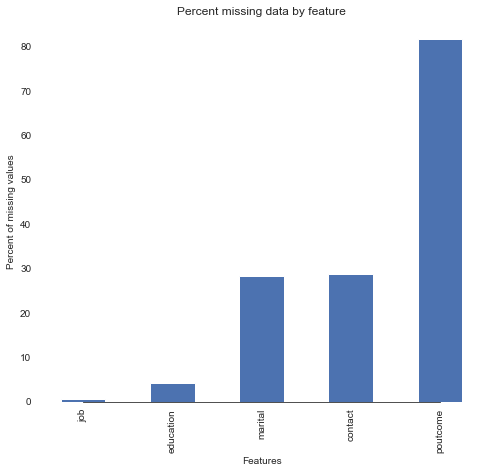

In [10]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

## 缺失值补全

In [11]:
## 缺失值补全，这里可以用众数代替
train['marital']=train['marital'].fillna('single')
train['education']=train['education'].fillna('secondary')
train['contact']=train['contact'].fillna('cellular')
train['poutcome']=train['poutcome'].fillna('failure')
train['job']=train['job'].fillna('blue-collar')

test['marital']=test['marital'].fillna('single')
test['education']=test['education'].fillna('secondary')
test['contact']=test['contact'].fillna('cellular')
test['poutcome']=test['poutcome'].fillna('failure')
test['job']=test['job'].fillna('blue-collar')
train.head()


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21647,21648,36,admin.,single,secondary,no,449,yes,no,cellular,20,jun,136,3,-1,0,failure,0
516,517,43,management,divorced,tertiary,no,-173,no,yes,cellular,18,aug,119,7,-1,0,failure,0
4464,4465,47,blue-collar,married,secondary,no,846,yes,no,cellular,31,jul,437,2,-1,0,failure,0
23169,23170,39,unemployed,divorced,secondary,no,265,yes,no,cellular,27,may,93,1,555,2,other,1
6322,6323,36,services,married,secondary,no,138,yes,no,cellular,8,may,39,3,-1,0,failure,0
4811,4812,31,blue-collar,single,secondary,no,369,yes,yes,cellular,27,may,30,8,-1,0,failure,0
21059,21060,59,retired,divorced,secondary,no,93,no,yes,cellular,8,aug,108,2,-1,0,failure,0
19184,19185,50,management,married,tertiary,no,85,no,yes,cellular,1,jun,141,1,-1,0,failure,0
9010,9011,43,entrepreneur,married,tertiary,no,210,no,no,cellular,29,jul,646,2,-1,0,failure,0
17376,17377,59,retired,divorced,primary,no,47,yes,no,telephone,18,may,110,3,374,1,failure,0


## 查看缺失值情况

In [12]:
#缺失值情况（以下没有缺失值，因为原数据使用unknow代替了缺失值，所以不显示有缺失值）
train.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 分类标签情况

In [13]:
train['y'].value_counts().to_frame().reset_index().rename(columns={'index': 'label', 'y': 'counts'})#显示分类的数量情况，0类有22356,1类有2961个

,label,counts
0,0,22356
1,1,2961


## 标签编码预处理

In [14]:
from sklearn import preprocessing

# 初始化编码器
le = preprocessing.LabelEncoder()
for col in train.columns:
    train[col] = le.fit_transform(train[col])
train.head()


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21647,21647,18,0,2,1,0,1206,1,0,0,19,6,136,2,0,0,0,0
516,516,25,4,0,2,0,587,0,1,0,17,1,119,6,0,0,0,0
4464,4464,29,1,1,1,0,1603,1,0,0,30,5,437,1,0,0,0,0
23169,23169,21,10,0,1,0,1022,1,0,0,26,8,93,0,455,2,1,1
6322,6322,18,7,1,1,0,895,1,0,0,7,8,39,2,0,0,0,0


In [15]:
train.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12658.000000,22.934826,4.266303,1.167555,1.142157,0.017696,1724.169886,0.553778,0.160327,0.064976,14.835289,5.523166,253.119129,1.769917,38.057076,0.580282,0.108228,0.116957
std,7308.532719,10.631655,3.235885,0.608091,0.652649,0.131845,1264.525918,0.497109,0.366916,0.246489,8.319480,3.010054,231.541569,3.107115,92.437038,1.874415,0.403094,0.321375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6329.000000,15.000000,1.000000,1.000000,1.000000,0.000000,830.000000,0.000000,0.000000,0.000000,7.000000,3.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12658.000000,21.000000,4.000000,1.000000,1.000000,0.000000,1205.000000,1.000000,0.000000,0.000000,15.000000,6.000000,181.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,18987.000000,30.000000,7.000000,2.000000,2.000000,0.000000,2182.000000,1.000000,0.000000,0.000000,20.000000,8.000000,317.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,25316.000000,74.000000,10.000000,2.000000,2.000000,1.000000,5735.000000,1.000000,1.000000,1.000000,30.000000,11.000000,1387.000000,42.000000,492.000000,35.000000,2.000000,1.000000


## 数据可视化

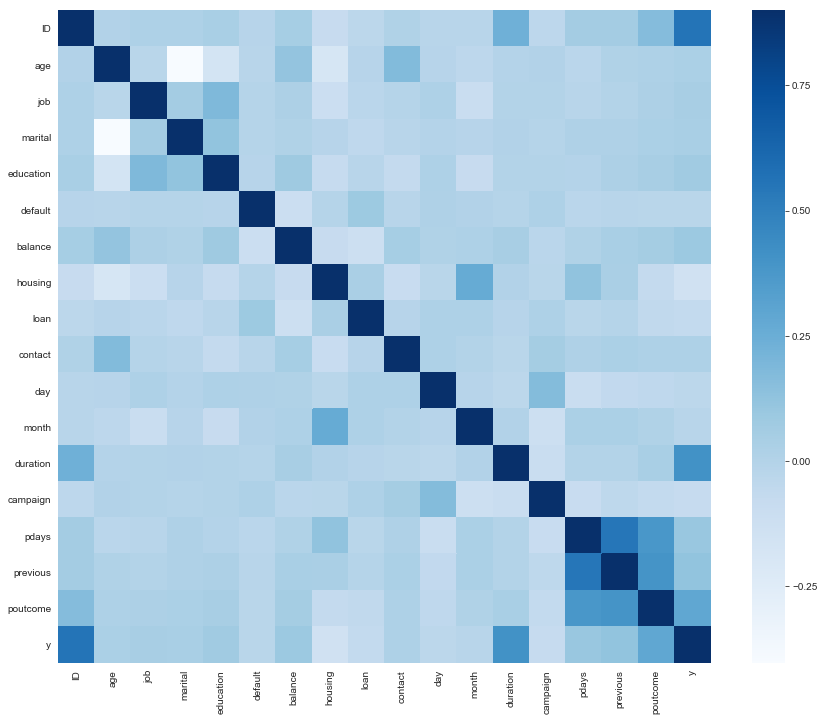

In [16]:
#绘制出这些特征之间的关系，以及它们与购买的关系。
corr = train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [17]:
train.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
ID,1.000000,0.008415,0.023099,0.023829,0.040292,-0.012188,0.050431,-0.079609,-0.034403,0.009974,-0.020171,-0.020631,0.237173,-0.038719,0.062294,0.061873,0.163904,0.556627
age,0.008415,1.000000,-0.024770,-0.403221,-0.164979,-0.019269,0.119709,-0.187352,-0.016267,0.174205,-0.016087,-0.037876,-0.002607,0.006505,-0.028107,0.009313,0.024007,0.029850
job,0.023099,-0.024770,1.000000,0.060130,0.186376,-0.007620,0.026659,-0.111892,-0.028210,-0.007482,0.020409,-0.092870,0.002696,0.003085,-0.018865,0.003235,0.028234,0.046966
marital,0.023829,-0.403221,0.060130,1.000000,0.123116,-0.009393,0.010216,-0.013737,-0.047111,-0.016505,-0.002969,-0.013278,0.005418,-0.011101,0.018683,0.015506,0.031569,0.041207
education,0.040292,-0.164979,0.186376,0.123116,1.000000,-0.015005,0.083629,-0.074761,-0.019467,-0.069206,0.021009,-0.079019,-0.000687,0.001443,-0.001480,0.027012,0.049772,0.070448
default,-0.012188,-0.019269,-0.007620,-0.009393,-0.015005,1.000000,-0.111456,-0.007891,0.085878,-0.017149,0.018430,0.008920,-0.010444,0.020256,-0.028942,-0.020134,-0.024145,-0.024608
balance,0.050431,0.119709,0.026659,0.010216,0.083629,-0.111456,1.000000,-0.080667,-0.117723,0.050572,0.013149,0.023774,0.045686,-0.027599,0.013267,0.043959,0.057379,0.093576
housing,-0.079609,-0.187352,-0.111892,-0.013737,-0.074761,-0.007891,-0.080667,1.000000,0.035130,-0.090897,-0.023025,0.268425,0.004391,-0.025478,0.128190,0.039359,-0.069064,-0.143589
loan,-0.034403,-0.016267,-0.028210,-0.047111,-0.019467,0.085878,-0.117723,0.035130,1.000000,-0.012115,0.020078,0.019473,-0.013976,0.020578,-0.023681,-0.007947,-0.053227,-0.065231
contact,0.009974,0.174205,-0.007482,-0.016505,-0.069206,-0.017149,0.050572,-0.090897,-0.012115,1.000000,0.023538,0.000766,-0.022094,0.056604,0.017722,0.030730,0.021057,0.020747


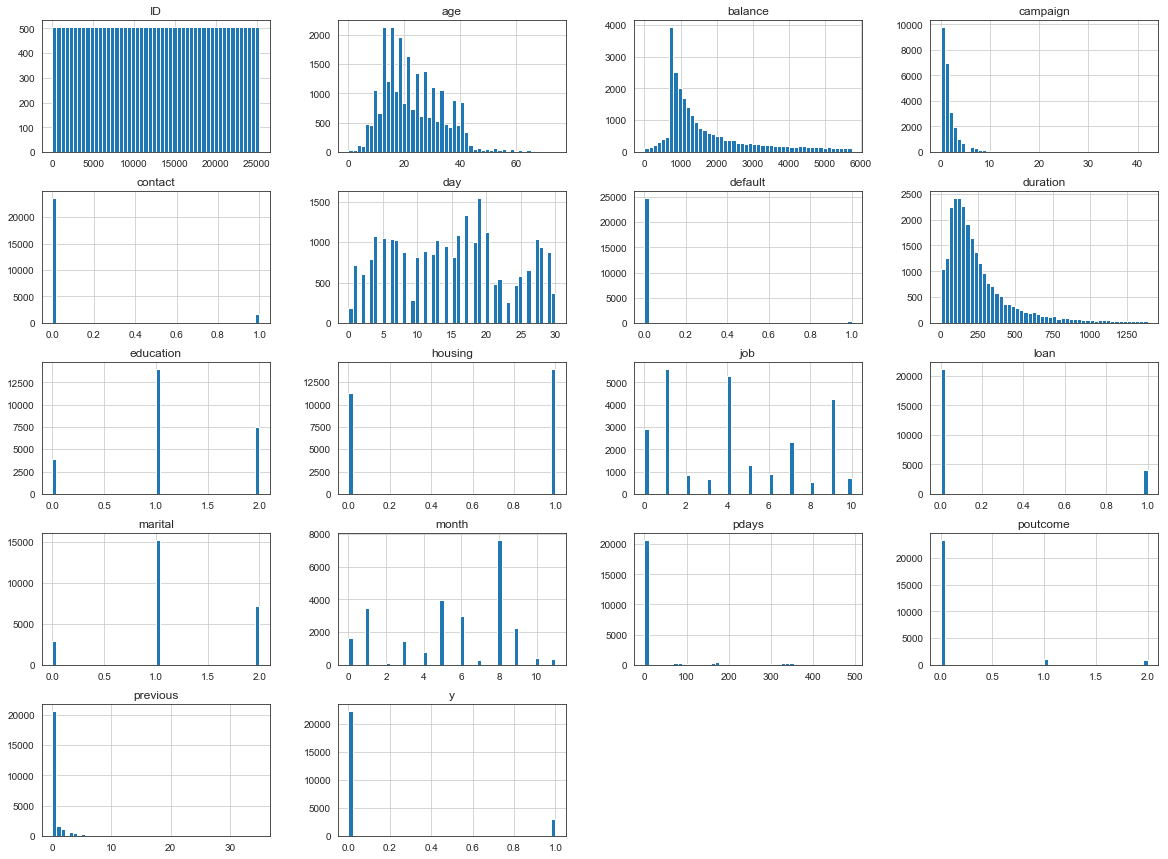

In [18]:
# 可视化探索各个特征的分布情况
result_plot = train.hist(bins=50, figsize=(20, 15))
#考虑到个别特征的

# 训练预测

## 特征的标准化

In [19]:
X = train.iloc[:, 1:17]
y = train.iloc[:, 17]
from sklearn import preprocessing
max_abs_scaler = preprocessing.MaxAbsScaler()#[-1,1]
X= max_abs_scaler.fit_transform(X)#训练集归一化

## 划分训练集和测试集

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=2019)
print(x_train.shape)
print(x_test.shape)

(20253, 16)
(5064, 16)


In [21]:
# 存储相关模型信息，以便后续分析
#model, train_score, test_score ,ROC_AUC_Score= [], [], [],[]
model, accuracy_score, recall_score, precision_score, f1_score, ROC_AUC_Score= [], [], [], [], [], []

## 模型

### LogisticRegression 二分类预测-初始参数

In [22]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

lr_init = LogisticRegression()  # 初始化
lr_init.fit(x_train, y_train)  # 训练
y_pred_lr_init = lr_init.predict(x_test)  # 预测
y_predprob_lr_init = lr_init.predict_proba(x_test)# 预测概率
y_predprob_lr_init = y_predprob_lr_init[:,1]

lr_init_fpr,lr_init_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_lr_init)
lr_init_roc_auc = metrics.auc(lr_init_fpr,lr_init_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', lr_init.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_lr_init))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_lr_init))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_lr_init))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_lr_init))


model.append(str(lr_init).split('(')[0] +'--'+ str('Initial_parameter'))

accuracy_score.append(metrics.accuracy_score(y_test, y_pred_lr_init))
recall_score.append(metrics.recall_score(y_test, y_pred_lr_init, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_lr_init, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_lr_init, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_lr_init))

>>>在训练集上的表现： 0.8991754308003752

>>>在测试集上的表现： 0.8994865718799369

>>>混淆矩阵
 [[4365  123]
 [ 386  190]]

>>>ROC_AUC Score (Train): 0.873931


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      4488
           1       0.61      0.33      0.43       576

    accuracy                           0.90      5064
   macro avg       0.76      0.65      0.69      5064
weighted avg       0.88      0.90      0.89      5064



**注:** 以下模型的参数都是采用网络搜索生成的最佳参数

### LogisticRegression 二分类预测

In [23]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
other_params = {'C':21.0, 'class_weight':None, 'dual':False, 'fit_intercept':True,
                'intercept_scaling':1, 'max_iter':120, 'multi_class':'warn',
                'n_jobs':None, 'penalty':'l2', 'random_state':None, 'solver':'warn',
                'tol':0.0001, 'verbose':0, 'warm_start':False}
lr = LogisticRegression(**other_params)  # 初始化
lr.fit(x_train, y_train)  # 训练
y_pred_lr = lr.predict(x_test)  # 预测
y_predprob_lr = lr.predict_proba(x_test)# 预测概率
y_predprob_lr = y_predprob_lr[:,1]

lr_fpr,lr_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_lr)
lr_roc_auc = metrics.auc(lr_fpr,lr_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', lr.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_lr))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_lr))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_lr))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_lr))

model.append(str(lr).split('(')[0])
accuracy_score.append(metrics.accuracy_score(y_test, y_pred_lr))
recall_score.append(metrics.recall_score(y_test, y_pred_lr, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_lr, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_lr, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_lr))

>>>在训练集上的表现： 0.8992741816027255

>>>在测试集上的表现： 0.8990916271721959

>>>混淆矩阵
 [[4360  128]
 [ 383  193]]

>>>ROC_AUC Score (Train): 0.874384


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      4488
           1       0.60      0.34      0.43       576

    accuracy                           0.90      5064
   macro avg       0.76      0.65      0.69      5064
weighted avg       0.88      0.90      0.89      5064



### Xgboost 二分类预测

In [24]:
from sklearn import metrics
import xgboost as xgb
other_params = {'booster': 'gbtree',
                'objective': 'reg:linear',
                 'subsample': 0.8,
                'colsample_bytree': 0.85,
                 'eta': 0.05,
                'max_depth': 7,
                'seed': 2016,
                'silent': 0,
                'eval_metric': 'rmse'}
xgb_model = xgb.XGBClassifier(**other_params)  # 初始化
xgb_model.fit(x_train, y_train)  # 训练
y_pred_xgb = xgb_model.predict(x_test)  # 预测
y_predprob_xgb = xgb_model.predict_proba(x_test)# 预测概率
y_predprob_xgb = y_predprob_xgb[:,1]

xgb_fpr,xgb_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_xgb)
xgb_roc_auc = metrics.auc(xgb_fpr,xgb_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', xgb_model.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_xgb))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_xgb))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_xgb))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_xgb))

model.append(str(xgb_model).split('(')[0])

accuracy_score.append(metrics.accuracy_score(y_test, y_pred_xgb))
recall_score.append(metrics.recall_score(y_test, y_pred_xgb, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_xgb, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_xgb, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_xgb))

>>>在训练集上的表现： 0.9584259122105367

>>>在测试集上的表现： 0.9036334913112164

>>>混淆矩阵
 [[4334  154]
 [ 334  242]]

>>>ROC_AUC Score (Train): 0.919621


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      4488
           1       0.61      0.42      0.50       576

    accuracy                           0.90      5064
   macro avg       0.77      0.69      0.72      5064
weighted avg       0.89      0.90      0.90      5064



### RFC 二分类预测

In [25]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

other_params = {'n_estimators':90,'max_depth':14,'max_features':5}
rfc_model=RandomForestClassifier(**other_params)#选择邻近的5个点

rfc_model.fit(x_train, y_train)  # 训练
y_pred_rfc = rfc_model.predict(x_test)  # 预测
y_predprob_rfc = rfc_model.predict_proba(x_test)# 预测概率
y_predprob_rfc = y_predprob_rfc[:,1]

rfc_fpr,rfc_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_rfc)
rfc_roc_auc = metrics.auc(rfc_fpr,rfc_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', rfc_model.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_rfc))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_rfc))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_rfc))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_rfc))

model.append(str(rfc_model).split('(')[0])

accuracy_score.append(metrics.accuracy_score(y_test, y_pred_rfc))
recall_score.append(metrics.recall_score(y_test, y_pred_rfc, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_rfc, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_rfc, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_rfc))

>>>在训练集上的表现： 0.9686466202537896

>>>在测试集上的表现： 0.9014612954186414

>>>混淆矩阵
 [[4333  155]
 [ 344  232]]

>>>ROC_AUC Score (Train): 0.915663


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      4488
           1       0.60      0.40      0.48       576

    accuracy                           0.90      5064
   macro avg       0.76      0.68      0.71      5064
weighted avg       0.89      0.90      0.89      5064



### lgb 二分类预测

In [26]:
from sklearn import metrics
import lightgbm as lgb

other_params = {"max_depth":75,"learning_rate" :0.05,"num_leaves":300, "n_estimators":200,'silent':False}
lgb_model = lgb.LGBMClassifier(**other_params)  

lgb_model.fit(x_train, y_train)  # 训练
y_pred_lgb = lgb_model.predict(x_test)  # 预测
y_predprob_lgb = lgb_model.predict_proba(x_test)# 预测概率
y_predprob_lgb = y_predprob_lgb[:,1]

lgb_fpr,lgb_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_lgb)
lgb_roc_auc = metrics.auc(lgb_fpr,lgb_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', lgb_model.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_lgb))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_lgb))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_lgb))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_lgb))

model.append(str(lgb_model).split('(')[0])
accuracy_score.append(metrics.accuracy_score(y_test, y_pred_lgb))
recall_score.append(metrics.recall_score(y_test, y_pred_lgb, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_lgb, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_lgb, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_lgb))

>>>在训练集上的表现： 1.0

>>>在测试集上的表现： 0.8983017377567141

>>>混淆矩阵
 [[4306  182]
 [ 333  243]]

>>>ROC_AUC Score (Train): 0.915544


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      4488
           1       0.57      0.42      0.49       576

    accuracy                           0.90      5064
   macro avg       0.75      0.69      0.71      5064
weighted avg       0.89      0.90      0.89      5064



### AdaBoost 二分类预测

In [27]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier

other_params = {'base_estimator' : None,#如果None，则基本估算器是DecisionTreeClassifier(max_depth=1)
                'n_estimators' :65,#提升终止的最大估计数。在完美契合的情况下，学习过程提前停止。
                'learning_rate' :0.8,#学习率会缩小每个分类器的贡献 learning_rate。在learning_rate和 之间需要权衡n_estimators。
                'algorithm' :'SAMME.R',#如果'SAMME.R'则使用SAMME.R真正的增强算法
                'random_state' : None#如果为None，则随机数生成器是由其使用的RandomState实例np.random
               }#参数默认就好
ada_model=AdaBoostClassifier(**other_params)

ada_model.fit(x_train, y_train)  # 训练
y_pred_ada = ada_model.predict(x_test)  # 预测
y_predprob_ada = ada_model.predict_proba(x_test)# 预测概率
y_predprob_ada = y_predprob_ada[:,1]

ada_fpr,ada_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_ada)
ada_roc_auc = metrics.auc(ada_fpr,ada_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', ada_model.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_ada))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_ada))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_ada))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_ada))

model.append(str(ada_model).split('(')[0])
accuracy_score.append(metrics.accuracy_score(y_test, y_pred_ada))
recall_score.append(metrics.recall_score(y_test, y_pred_ada, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_ada, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_ada, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_ada))

>>>在训练集上的表现： 0.8997185602133018

>>>在测试集上的表现： 0.9000789889415481

>>>混淆矩阵
 [[4359  129]
 [ 377  199]]

>>>ROC_AUC Score (Train): 0.895136


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      4488
           1       0.61      0.35      0.44       576

    accuracy                           0.90      5064
   macro avg       0.76      0.66      0.69      5064
weighted avg       0.88      0.90      0.89      5064



### MLP 二分类预测

In [28]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

other_params = {'hidden_layer_sizes':(512,256,128,64,32,16),#各个隐藏层的神经元个数
                'activation':'relu',#激活函数
                 'solver':'adam',#权重优化算法，lbfgs、sgd、adam
                'alpha':0.0001, #正则化项参数
                'batch_size':'auto',#随机优化的minibatches的大小
                'learning_rate':'constant', #学习率，constant、invscaling、adaptive
                'learning_rate_init':0.001,#初始学习率。只有当solver为sgd或adam时才使用
                'power_t':0.5,#初始学习率。只有当solver为sgd或adam时才使用。
                'max_iter':200,#最大迭代次数
                'shuffle':True,#是否在每次迭代时对样本进行清洗，当solver为sgd或adam时使用
                'random_state':None, #随机数种子
                'tol':0.0001, #优化算法停止的条件。当迭代前后的函数差值小于等于tol时就停止
                'verbose':False,#是否将过程打印出
                'warm_start':False,#是否使用之前的解决方法作为初始拟合
                'momentum':0.9 ,#梯度下降的动量，介于0到1之间，solver为sgd时使用
                'nesterovs_momentum':True,#是否使用Nesterov动量
                'early_stopping':False,#判断当验证效果不再改善时是否终止训练
                'validation_fraction':0.1,#用作早起停止验证的预留训练集的比例，0到1之间
                'beta_1':0.9,#估计一阶矩向量的指数衰减速率，[0,1)之间
                'beta_2':0.999,#估计二阶矩向量的指数衰减速率，[0,1)之间
                'epsilon':1e-08,#数值稳定值，solver为adam时使用
                'n_iter_no_change':10}

mlp_model=MLPClassifier(**other_params)
mlp_model.fit(x_train, y_train)  # 训练
y_pred_mlp = mlp_model.predict(x_test)  # 预测
y_predprob_mlp = mlp_model.predict_proba(x_test)# 预测概率
y_predprob_mlp = y_predprob_mlp[:,1]

mlp_fpr,mlp_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_mlp)
mlp_roc_auc = metrics.auc(mlp_fpr,mlp_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', mlp_model.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_mlp))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_mlp))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_mlp))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_mlp))

model.append(str(mlp_model).split('(')[0])
accuracy_score.append(metrics.accuracy_score(y_test, y_pred_mlp))
recall_score.append(metrics.recall_score(y_test, y_pred_mlp, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_mlp, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_xgb, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_mlp))

>>>在训练集上的表现： 0.991902434207278

>>>在测试集上的表现： 0.870260663507109

>>>混淆矩阵
 [[4171  317]
 [ 340  236]]

>>>ROC_AUC Score (Train): 0.833752


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      4488
           1       0.43      0.41      0.42       576

    accuracy                           0.87      5064
   macro avg       0.68      0.67      0.67      5064
weighted avg       0.87      0.87      0.87      5064



### SVM 二分类预测

In [29]:
from sklearn import metrics,svm

other_params = {'C':100,'probability':True}#参数默认就好
svm_model=svm.SVC(**other_params)#选择邻近的5个点

svm_model.fit(x_train, y_train)  # 训练
y_pred_svm = svm_model.predict(x_test)  # 预测
y_predprob_svm = svm_model.predict_proba(x_test)# 预测概率
y_predprob_svm = y_predprob_svm[:,1]

svm_fpr,svm_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_svm)
svm_roc_auc = metrics.auc(svm_fpr,svm_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', svm_model.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_svm))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_svm))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_svm))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_svm))

model.append(str(svm_model).split('(')[0])
accuracy_score.append(metrics.accuracy_score(y_test, y_pred_svm))
recall_score.append(metrics.recall_score(y_test, y_pred_svm, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_svm, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_svm, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_svm))

>>>在训练集上的表现： 0.8999654372191774

>>>在测试集上的表现： 0.8957345971563981

>>>混淆矩阵
 [[4383  105]
 [ 423  153]]

>>>ROC_AUC Score (Train): 0.844949


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      4488
           1       0.59      0.27      0.37       576

    accuracy                           0.90      5064
   macro avg       0.75      0.62      0.66      5064
weighted avg       0.88      0.90      0.88      5064



### KNN 二分类预测

In [30]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

other_params = {'n_neighbors':5,'leaf_size':30, 'weights':'distance'}
knn_model=KNeighborsClassifier(**other_params)

knn_model.fit(x_train, y_train)  # 训练
y_pred_knn = knn_model.predict(x_test)  # 预测
y_predprob_knn = knn_model.predict_proba(x_test)# 预测概率
y_predprob_knn = y_predprob_knn[:,1]

knn_fpr,knn_tpr,thresholds = metrics.roc_curve(y_test,y_predprob_knn)
knn_roc_auc = metrics.auc(knn_fpr,knn_tpr) #计算auc的值

# 性能评估
print('>>>在训练集上的表现：', knn_model.score(x_train, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_knn))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_knn))
print("\n>>>ROC_AUC Score (Train): %f\n" % metrics.roc_auc_score(y_test, y_predprob_knn))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_knn))

model.append(str(knn_model).split('(')[0])
accuracy_score.append(metrics.accuracy_score(y_test, y_pred_knn))
recall_score.append(metrics.recall_score(y_test, y_pred_knn, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_knn, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_knn, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_knn))

>>>在训练集上的表现： 1.0

>>>在测试集上的表现： 0.8953396524486572

>>>混淆矩阵
 [[4366  122]
 [ 408  168]]

>>>ROC_AUC Score (Train): 0.786311


>>>分类评价函数
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      4488
           1       0.58      0.29      0.39       576

    accuracy                           0.90      5064
   macro avg       0.75      0.63      0.67      5064
weighted avg       0.88      0.90      0.88      5064



## 可视化特征重要性权重

>>>特征权重值
 [0.0986971  0.04189157 0.0239197  0.01711497 0.00174081 0.12988875
 0.0256379  0.00781912 0.00447538 0.09755474 0.08001434 0.27090892
 0.03244658 0.0568599  0.01386074 0.09716948]

>>>索引降序排列
 [11  5  0  9 15 10 13  1 12  6  2  3 14  7  8  4]

>>>特征名
 ['duration', 'balance', 'age', 'day', 'poutcome', 'month', 'pdays', 'job', 'campaign', 'housing', 'marital', 'education', 'previous', 'loan', 'contact', 'default']


Text(0.5, 1.0, 'Feature Weights')

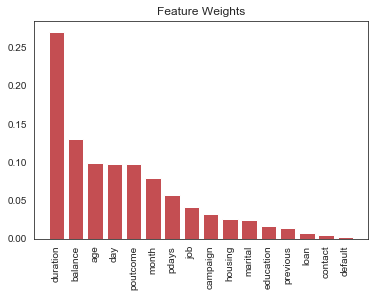

In [31]:
#无论是分类还是回归问题都可以使用决策树算法来获取特征重要性权重值。
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()  # 初始化
dtc.fit(x_train, y_train)  # 训练

# 获取特征权重值
weights = dtc.feature_importances_
print('>>>特征权重值\n', weights)

# 索引降序排列
sort_index = np.argsort(weights)[::-1] 
# 对应的特征名
name = [train.iloc[:, 1:].columns[i] for i in sort_index]
print('\n>>>索引降序排列\n', sort_index)
print('\n>>>特征名\n', name)

# 可视化
plt.bar(x=name, height=weights[sort_index], color='r')
_ = plt.xticks(rotation=90)
plt.title('Feature Weights')
#下图可以看出每个特征都有作用，都不可舍去

### PCA降维（提取主成分）

In [32]:
from sklearn.decomposition import PCA

# ---------------------------------------------
# 最佳主成分数量
pca = PCA(n_components=None)
pca.fit_transform(x_train)
var_values = pca.explained_variance_ratio_

def select_best_components(var_, goal_var):
    best_components, total_var = 0, 0.0  # 初始化
    for var in var_:
        total_var += var
        best_components += 1
        if total_var >= goal_var:  # 达到目标方差，终止整个循环
            break
    return best_components
n = select_best_components(var_=var_values, goal_var=0.95)
print('\n>>>最好的特征数量为 %d 个'% n)

# ---------------------------------------------
# 根据上面的最佳 n_components 数量，进行降维
pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

# --------------------------------------------
# PCA + LogisticRegression 训练和预测
lr = LogisticRegression()  # 初始化
lr.fit(x_train_pca, y_train)  # 训练
y_pred_pca_lr = lr.predict(x_test_pca)  # 预测
y_predprob_pca_lr = lr.predict_proba(x_test_pca)# 预测概率
y_predprob_pca_lr = y_predprob_pca_lr[:,1]
# 性能评估
print('\n>>>在训练集上的表现：', lr.score(x_train_pca, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_pca_lr))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_pca_lr))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_pca_lr))

model.append(str(lr).split('(')[0] +'--'+ str(pca).split('(')[0])
accuracy_score.append(metrics.accuracy_score(y_test, y_pred_pca_lr))
recall_score.append(metrics.recall_score(y_test, y_pred_pca_lr, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_pca_lr, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_pca_lr, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_pca_lr))


>>>最好的特征数量为 12 个

>>>在训练集上的表现： 0.8903866093912013

>>>在测试集上的表现： 0.8888230647709321

>>>混淆矩阵
 [[4448   40]
 [ 523   53]]

>>>分类评价函数
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      4488
           1       0.57      0.09      0.16       576

    accuracy                           0.89      5064
   macro avg       0.73      0.54      0.55      5064
weighted avg       0.86      0.89      0.85      5064



### LDA(监督学习)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# -----------------------------------------
# 降维
lda = LinearDiscriminantAnalysis(n_components=None)
x_train_lda = lda.fit(x_train, y_train).transform(x_train)
x_test_lda = lda.fit(x_test, y_test).transform(x_test)
print(x_train_lda.shape)

# ----------------------------------------
# 训练和预测
lr = LogisticRegression()  # 初始化
lr.fit(x_train_lda, y_train)  # 训练
y_pred_lda_lr = lr.predict(x_test_lda)  # 预测
y_predprob_lda_lr = lr.predict_proba(x_test_lda)# 预测概率
y_predprob_lda_lr = y_predprob_lda_lr[:,1]
# 性能评估
print('\n>>>在训练集上的表现：', lr.score(x_train_lda, y_train))
print('\n>>>在测试集上的表现：', metrics.accuracy_score(y_test, y_pred_lda_lr))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(y_test, y_pred_lda_lr))
print('\n>>>分类评价函数\n', metrics.classification_report(y_test, y_pred_lda_lr))

model.append(str(lr).split('(')[0] +'--'+ str(lda).split('(')[0])
accuracy_score.append(metrics.accuracy_score(y_test, y_pred_lda_lr))
recall_score.append(metrics.recall_score(y_test, y_pred_lda_lr, average='binary'))
precision_score.append(metrics.precision_score(y_test, y_pred_lda_lr, average='binary'))
f1_score.append(metrics.f1_score(y_test, y_pred_lda_lr, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(y_test, y_predprob_lda_lr))


(20253, 1)

>>>在训练集上的表现： 0.8999160618180023

>>>在测试集上的表现： 0.9012638230647709

>>>混淆矩阵
 [[4367  121]
 [ 379  197]]

>>>分类评价函数
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      4488
           1       0.62      0.34      0.44       576

    accuracy                           0.90      5064
   macro avg       0.77      0.66      0.69      5064
weighted avg       0.89      0.90      0.89      5064



## 特征增加方法

In [34]:

import lightgbm as lgb
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

data=pd.concat([train_df,test_df])
def feature_count(data, features):
    feature_name = 'count'
    for i in features:
        feature_name += '_' + i
    temp = data.groupby(features).size().reset_index().rename(columns={0: feature_name})
    data = data.merge(temp, 'left', on=features)
    return data,feature_name

feature=data.columns.tolist()
feature.remove('ID')
feature.remove('y')
sparse_feature= ['campaign','contact','default','education','housing','job','loan','marital','month','poutcome']
dense_feature=list(set(feature)-set(sparse_feature))

ll=[]
for f in['campaign', 'contact','default','education','housing','job','loan','marital','poutcome']:
    data,_=feature_count(data,['day','month',f])
    ll.append(_)

def get_new_columns(name,aggs):
    l=[]
    for k in aggs.keys():
        for agg in aggs[k]:
            if str(type(agg))=="<class 'function'>":
                l.append(name + '_' + k + '_' + 'other')
            else:
                l.append(name + '_' + k + '_' + agg)
    return l

for d in tqdm(sparse_feature):
    aggs={}
    for s in sparse_feature:
        aggs[s]=['count','nunique']
    for den in dense_feature:
        aggs[den]=['mean','max','min','std']
    aggs.pop(d)
    temp=data.groupby(d).agg(aggs).reset_index()
    temp.columns=[d]+get_new_columns(d,aggs)
    data=pd.merge(data,temp,on=d,how='left')

data.head()

for s in ['campaign','contact','default','education','housing','job','loan','marital','month','poutcome']:
    data=pd.concat([data,pd.get_dummies(data[s],prefix=s+'_')],axis=1)
    data.drop(s,axis=1,inplace=True)

df_train=data[data['y'].notnull()]
df_test=data[data['y'].isnull()]

target=df_train['y']
df_train_columns=df_train.columns.tolist()
df_train_columns.remove('ID')
df_train_columns.remove('y')

param = {'num_leaves': 30,#31
         'min_data_in_leaf': 30,
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'auc',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 666}

folds = StratifiedKFold(n_splits=12, shuffle=True, random_state=666)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train,df_train['y'].values)):
    print("fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][df_train_columns], label=target.iloc[trn_idx])#, categorical_feature=categorical_feats)
    val_data = lgb.Dataset(df_train.iloc[val_idx][df_train_columns], label=target.iloc[val_idx])#, categorical_feature=categorical_feats)

    num_round = 1000#100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][df_train_columns], num_iteration=clf.best_iteration)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = df_train_columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    predictions += clf.predict(df_test[df_train_columns], num_iteration=clf.best_iteration) / folds.n_splits


from sklearn.metrics import roc_auc_score,roc_curve
import pandas as pd

roc_auc_score(target,oof)
y_pred_clf=np.zeros(len(oof),dtype=int)
for i in range(len(oof)):
     if oof[i]>=0.5:
        y_pred_clf[i]=1
     else:
        y_pred_clf[i]=0
        
clf_fpr,clf_tpr,thresholds = roc_curve(target,oof)
clf_roc_auc = metrics.auc(clf_fpr,clf_tpr) #计算auc的值        
        
        
# 性能评估
print('\n>>>在测试集上的表现：', metrics.accuracy_score(target, y_pred_clf))
print('\n>>>混淆矩阵\n', metrics.confusion_matrix(target, y_pred_clf))
print('\n>>>分类评价函数\n', metrics.classification_report(target, y_pred_clf))

model.append(str('lr_sparse'))
accuracy_score.append(metrics.accuracy_score(target, y_pred_clf))
recall_score.append(metrics.recall_score(target, y_pred_clf, average='binary'))
precision_score.append(metrics.precision_score(target, y_pred_clf, average='binary'))
f1_score.append(metrics.f1_score(target, y_pred_clf, average='binary'))
ROC_AUC_Score.append(metrics.roc_auc_score(target, oof))

100%|██████████████████████████████████████████| 10/10 [00:25<00:00,  4.00s/it]


fold 0
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.946401	valid_1's auc: 0.931965
[200]	training's auc: 0.952637	valid_1's auc: 0.934214
[300]	training's auc: 0.957546	valid_1's auc: 0.935899
[400]	training's auc: 0.962171	valid_1's auc: 0.936776
[500]	training's auc: 0.966328	valid_1's auc: 0.937394
[600]	training's auc: 0.969989	valid_1's auc: 0.937861
[700]	training's auc: 0.973206	valid_1's auc: 0.937998
[800]	training's auc: 0.975973	valid_1's auc: 0.937926
Early stopping, best iteration is:
[700]	training's auc: 0.973206	valid_1's auc: 0.937998
fold 1
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.9459	valid_1's auc: 0.938498
[200]	training's auc: 0.952101	valid_1's auc: 0.940599
[300]	training's auc: 0.957075	valid_1's auc: 0.941088
[400]	training's auc: 0.961748	valid_1's auc: 0.941331
[500]	training's auc: 0.965856	valid_1's auc: 0.941914
[600]	training's auc: 0.969575	valid_1's auc: 0.941899
Ea

**总结：**
由上面 DataFrame 表格可以说明，在进行降维（主成分提取）后，训练和预测的效果都没有我们预期的好，反倒比原始算法性能更差。

**结论：**
1 PCA 降维后的训练效果非常差，在本案例中，PCA 提取主成分不适合运用：
一方面PCA是无监督学习算法，容易忽略分类标签(label)来进行笼统的降维。
另一方面，PCA 更适合更高维度的降维，比如特征维度有几百个甚至更大时，PCA 降维的作用才会更加显著。
2 LDA 线性时效分析是监督学习，在本次案例中表现还是挺不错的，不过还是比原始模型性能差一点。
3.特征增加学习使用的方法表现的不错。
由此来看，提取主成分特征不能再进一步提高模型的性能，因此我们对原始算法 LogisticRegression 进行参数调优

# 超参数调优

###  网格搜索进行参数调优

In [35]:
#以下注释提供网络搜索参数调优方案的代码
'''
import pandas as pd
from sklearn.utils import shuffle
from sklearn import preprocessing,metrics
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score
cv_params = { 'subsample': np.linspace(0.1,1,10)}
other_params = {'booster': 'gbtree',
                'objective': 'reg:linear',
                'colsample_bytree': 0.85,
                 'eta': 0.05,
                'max_depth': 7,
                'seed': 2016,
                'silent': 0,
                'eval_metric': 'rmse'}
model=xgb.XGBClassifier(**other_params)#选择邻近的5个点
#超参数调试
optimized_model = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=5,n_jobs=4)
optimized_model.fit(X_train, y_train)
evalute_result = optimized_model.cv_results_['mean_test_score']
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_model.best_params_))#best_score_#查看最佳分数(此处为f1_score)
print('最佳模型得分:{0}'.format(optimized_model.best_score_))#best_params_#查看最佳参数
'''

"\nimport pandas as pd\nfrom sklearn.utils import shuffle\nfrom sklearn import preprocessing,metrics\nimport xgboost as xgb\nfrom sklearn.model_selection import train_test_split,cross_val_score\ncv_params = { 'subsample': np.linspace(0.1,1,10)}\nother_params = {'booster': 'gbtree',\n                'objective': 'reg:linear',\n                'colsample_bytree': 0.85,\n                 'eta': 0.05,\n                'max_depth': 7,\n                'seed': 2016,\n                'silent': 0,\n                'eval_metric': 'rmse'}\nmodel=xgb.XGBClassifier(**other_params)#选择邻近的5个点\n#超参数调试\noptimized_model = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=5,n_jobs=4)\noptimized_model.fit(X_train, y_train)\nevalute_result = optimized_model.cv_results_['mean_test_score']\nprint('每轮迭代运行结果:{0}'.format(evalute_result))\nprint('参数的最佳取值：{0}'.format(optimized_model.best_params_))#best_score_#查看最佳分数(此处为f1_score)\nprint('最佳模型得分:{0}'.format(optimized_model.best_score_))#best

# 性能情况分析

### 列表比较不同模型之间的性能情况

In [36]:
train = pd.DataFrame()
train['model'] = model
train['accuracy_score'] = accuracy_score
train['recall_score'] = recall_score
train['precision_score'] = precision_score
train['f1_score'] = f1_score
train['ROC_AUC_Score'] = ROC_AUC_Score
train

,model,accuracy_score,recall_score,precision_score,f1_score,ROC_AUC_Score
0,LogisticRegression--Initial_parameter,0.899487,0.329861,0.607029,0.427447,0.873931
1,LogisticRegression,0.899092,0.335069,0.601246,0.430323,0.874384
2,XGBClassifier,0.903633,0.420139,0.611111,0.497942,0.919621
3,RandomForestClassifier,0.901461,0.402778,0.599483,0.481828,0.915663
4,LGBMClassifier,0.898302,0.421875,0.571765,0.485514,0.915544
5,AdaBoostClassifier,0.900079,0.345486,0.606707,0.440265,0.895136
6,MLPClassifier,0.870261,0.409722,0.426763,0.497942,0.833752
7,SVC,0.895735,0.265625,0.593023,0.366906,0.844949
8,KNeighborsClassifier,0.895340,0.291667,0.579310,0.387991,0.786311
9,LogisticRegression--PCA,0.888823,0.092014,0.569892,0.158445,0.683409


由上面的 DataFrame 表格可以得出，进行超参数调优之后的模型性能无论在train还是test上都比原始模型好。

**结论**
1 降维/主成分提取在本案例效果不明显;
2 超参数调优对模型有正向积极作用;
3 数据特征增加维数可以提高数据量，有利于模型训练。

### ROC曲线比较不同模型之间的性能情况

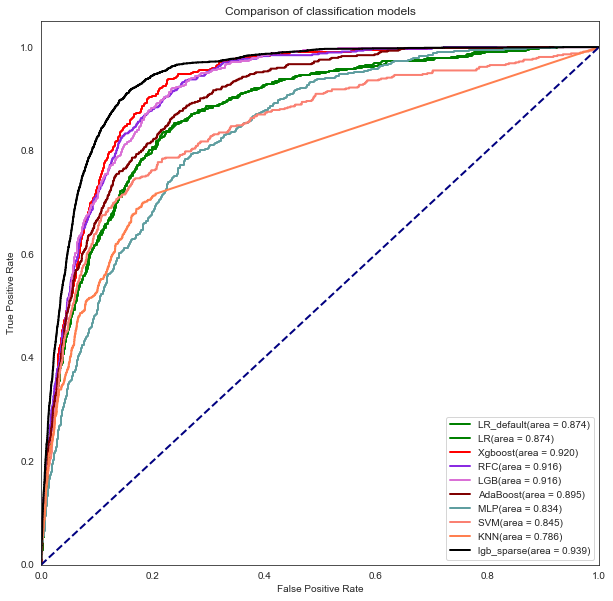

In [37]:
lw = 2
plt.figure(figsize=(10,10))
plt.plot(lr_init_fpr, lr_init_tpr, color='green',lw=lw, label='LR_default(area = %0.3f)' % lr_init_roc_auc)
plt.plot(lr_fpr, lr_tpr, color='green',lw=lw, label='LR(area = %0.3f)' % lr_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, color='red',lw=lw, label='Xgboost(area = %0.3f)' % xgb_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, color='blueviolet',lw=lw, label='RFC(area = %0.3f)' % rfc_roc_auc)
plt.plot(lgb_fpr, lgb_tpr, color='orchid',lw=lw, label='LGB(area = %0.3f)' % lgb_roc_auc)
plt.plot(ada_fpr, ada_tpr, color='maroon',lw=lw, label='AdaBoost(area = %0.3f)' % ada_roc_auc)
plt.plot(mlp_fpr, mlp_tpr, color='cadetblue',lw=lw, label='MLP(area = %0.3f)' % mlp_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='salmon',lw=lw, label='SVM(area = %0.3f)' % svm_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='coral',lw=lw, label='KNN(area = %0.3f)' % knn_roc_auc)
plt.plot(clf_fpr, clf_tpr, color='black',lw=lw, label='lgb_sparse(area = %0.3f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of classification models')
plt.legend(loc="lower right")
plt.show()

# 预测测试集结果

In [38]:
'''
#各个模型输出结果格式要求，其中model要换各个模型的模型名
y_predprob = model.predict_proba(test)
y_predprob = y_predprob[:,1]
ID = list(range(25318,36170))#list()方法用于将数组转换为列表
submission = pd.DataFrame(ID)#将ID列表从array转化成DataFrame
submission.rename(columns = {0: 'ID'}, inplace = True)

y_predprob = pd.DataFrame(y_predprob)#将pred_y从array转化成DataFrame
submission['pred'] =y_predprob#自动添加列名为‘pred’，结果为y_predprob

submission.to_csv('Result.csv', index = False)#导出.csv结果
'''

"\n#各个模型输出结果格式要求，其中model要换各个模型的模型名\ny_predprob = model.predict_proba(test)\ny_predprob = y_predprob[:,1]\nID = list(range(25318,36170))#list()方法用于将数组转换为列表\nsubmission = pd.DataFrame(ID)#将ID列表从array转化成DataFrame\nsubmission.rename(columns = {0: 'ID'}, inplace = True)\n\ny_predprob = pd.DataFrame(y_predprob)#将pred_y从array转化成DataFrame\nsubmission['pred'] =y_predprob#自动添加列名为‘pred’，结果为y_predprob\n\nsubmission.to_csv('Result.csv', index = False)#导出.csv结果\n"

In [39]:
#数据特征增加方法输出结果,线上结果0.93928
sub=df_test[['ID']]
sub['pred']=predictions
sub.to_csv('Result.csv',index=False)